In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


**Roadmap to solve the problem**
1. import the dataset
2. understand the nature of data using .shape,.info()
3. check the summary of the dataset using .describe()
4. Data Cleaning i.e Handle the missing values
5. (removing the duplicates will check during model testing)
6. Data Visualization i.e plot the graphs to understand the data better
7. Check for outliers
8. Feature Engineering(Scaling,Selection,Normalization)

In [2]:
df_hotel = pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Nature of the data

In [3]:
df_hotel.shape

(119390, 32)

In [4]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# checking the data types 
# 1. change the arrival_date_month into int64
# 2. change the children into int64 (it's better to do this after handling the missing values)
# 3. change the reservation_status_date into datetime
# 4. combining the arrival_date_year,arrival_date_month,arrival_date_day_of_month into single column

In [6]:
import calendar
df_hotel['arrival_date_month'] = df_hotel['arrival_date_month'].apply(lambda x : list(calendar.month_name).index(x))

In [7]:
df_hotel['reservation_status_date'] = pd.to_datetime(df_hotel['reservation_status_date'], format='%Y-%m-%d')

In [8]:
df_hotel['arrival_date'] = pd.to_datetime(df_hotel['arrival_date_year'].astype('str')+'-'+df_hotel['arrival_date_month'].astype('str')+'-'+df_hotel['arrival_date_day_of_month'].astype('str'))
df_hotel.drop(columns = ['arrival_date_year','arrival_date_month','arrival_date_day_of_month'],inplace=True)

In [9]:
df_hotel.columns
df_hotel = df_hotel[['hotel', 'is_canceled', 'lead_time', 'arrival_date', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']]
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,27,0,0,2,0.0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,27,0,0,2,0.0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,27,0,1,1,0.0,0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,27,0,1,1,0.0,0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,27,0,2,2,0.0,0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Handling the missing values

In [10]:
missing_values = df_hotel.isnull().sum()
missing_values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date                           0
arrival_date_week_number               0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [11]:
# dropping the column which have atleast 70% of missing values
# impute other missing values

In [12]:
column_name = missing_values[missing_values > (0.7*(df_hotel.shape[0]))].index.tolist()[0]
df_hotel.drop(column_name,axis=1,inplace=True)


In [13]:
df_hotel['agent'].fillna(method='bfill',inplace=True)
df_hotel['country'].fillna(method='ffill',inplace=True)
df_hotel['children'].fillna(method='ffill',inplace=True)

In [14]:
# convert the children data type to int64
df_hotel['children'] = df_hotel['children'].astype('int')

In [15]:
df_hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date                      0
arrival_date_week_number          0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

# Data Visualization

Let's answer the following questions with visualization
1. How lead time affects cancellation?
2. Which type of hotel has more cancellation?
3. Which week of the year experiences more bookings?

**1. How lead time affects cancellation?**

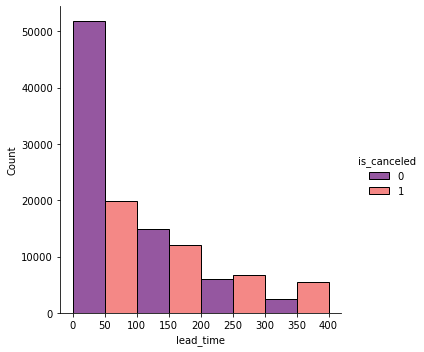

In [85]:
sns.displot(df_hotel,x='lead_time',hue ='is_canceled',binwidth=100,multiple='dodge',palette='magma')

With increasing lead time the number of bookings canceled is increasing when compared to bookings which are not canceled

**2. Which type of hotel has more cancellation?**

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

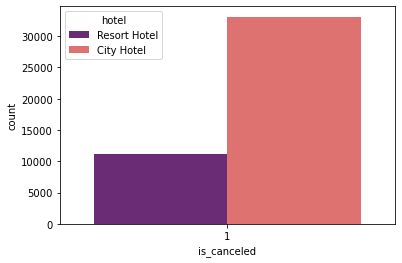

In [87]:
canceled_count = df_hotel[df_hotel['is_canceled'] == 1]
sns.countplot(data = canceled_count,x='is_canceled',hue='hotel',palette='magma')

City Hotel has more number of cancellations than Resort Hotel

3. **Which week of the year experiences more booking?**

<AxesSubplot:xlabel='arrival_date_week_number', ylabel='count'>

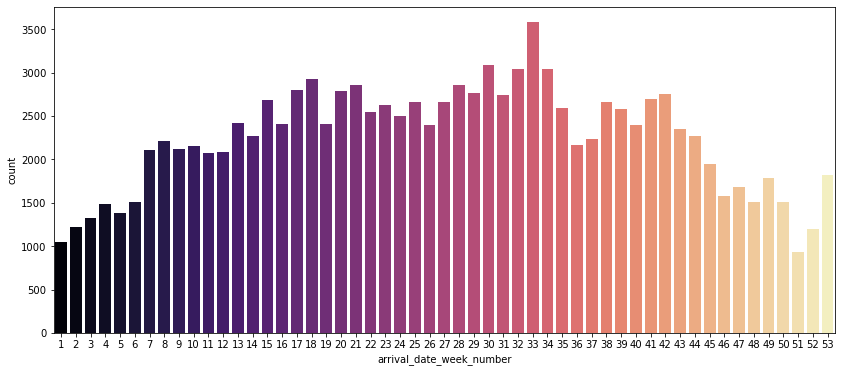

In [78]:
plt.figure(figsize=(14,6))
sns.countplot(data = df_hotel,x = 'arrival_date_week_number',palette='magma')

33rd week of the year have seen maximum number of bookings

# Remove the outliers

**Let's remove the outliers using IQR method**

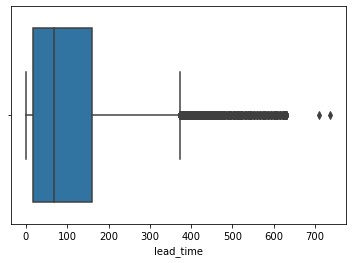

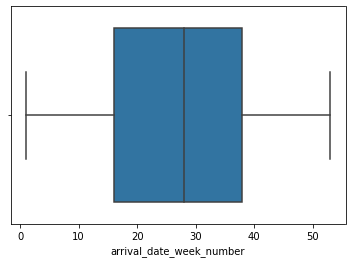

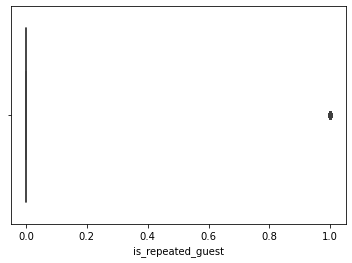

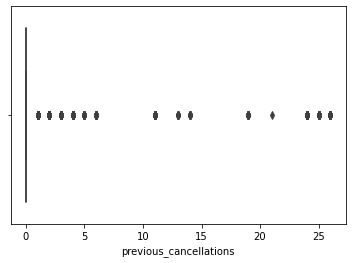

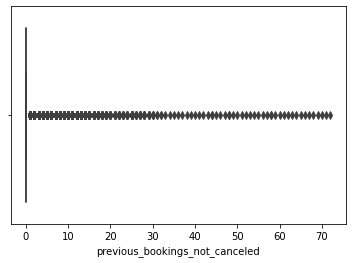

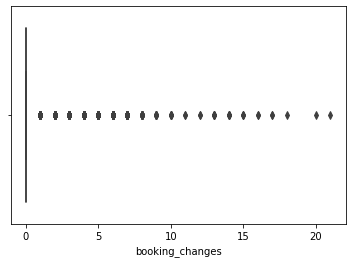

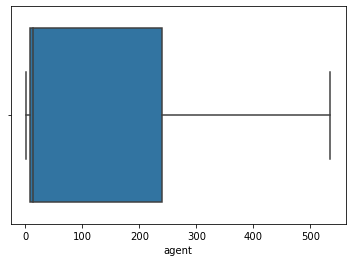

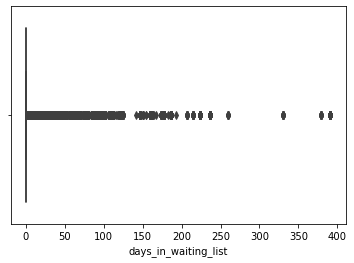

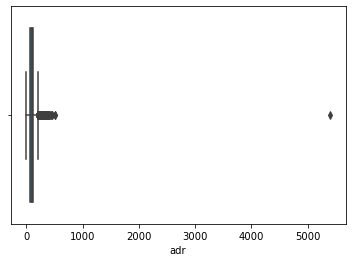

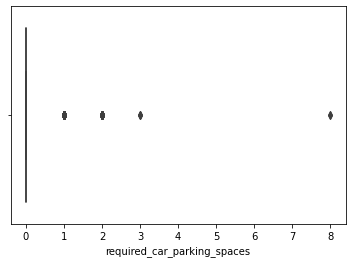

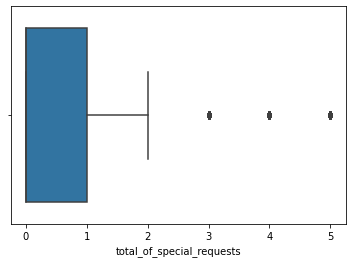

In [18]:
for i in df_hotel_num:
    sns.boxplot(data = df_hotel,x=i)
    plt.show()

In [19]:
df_hotel_box = df_hotel[['lead_time','arrival_date_week_number','stays_in_weekend_nights','stays_in_week_nights','agent','adr','total_of_special_requests']]

In [20]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    return lower,upper

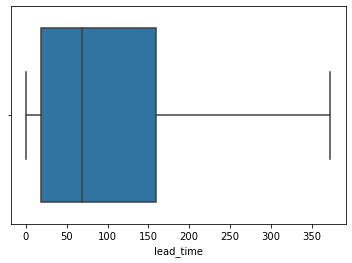

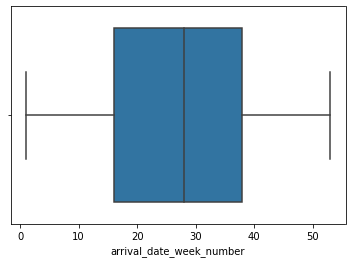

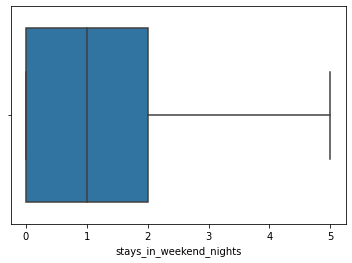

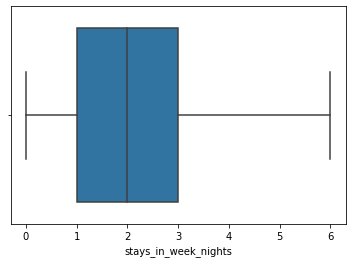

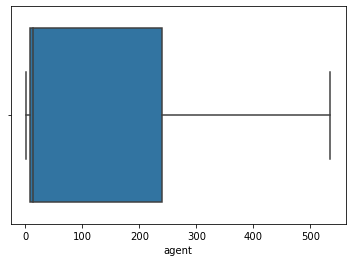

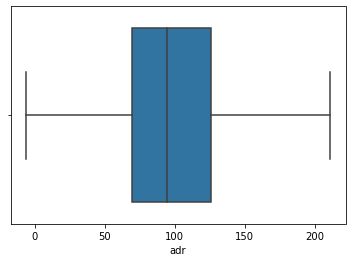

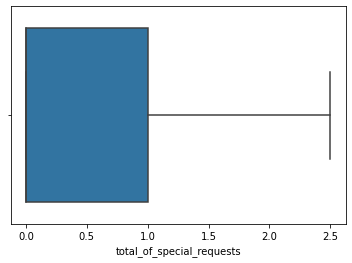

In [21]:
for i in df_hotel_box:
    low,up = remove_outlier(df_hotel[i])
    df_hotel[i] = np.where(df_hotel[i]>up,up,df_hotel[i])
    df_hotel[i] = np.where(df_hotel[i]<low,low,df_hotel[i])
    sns.boxplot(data=df_hotel,x=i)
    plt.show()

In [22]:
df_hotel[['lead_time','arrival_date_week_number','stays_in_weekend_nights','stays_in_week_nights','total_of_special_requests']] = df_hotel[['lead_time','arrival_date_week_number','stays_in_weekend_nights','stays_in_week_nights','total_of_special_requests']].astype('int')